In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import classification_report,accuracy_score,r2_score, mean_absolute_error
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [3]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1


In [7]:
['cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','ca','slope','thal','target']
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
np.unique(df['restecg'])

array([0, 1, 2], dtype=int64)

In [51]:
np.unique(df['slope'])

array([0, 1, 2], dtype=int64)

In [10]:
categoric_col=['cp','sex','fbs','restecg','exang','ca','slope','thal']
df.drop(categoric_col,axis=1).corr()

,age,trestbps,chol,thalach,oldpeak,target
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
target,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(303, 14)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(302, 14)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [17]:
dtree = DecisionTreeClassifier(random_state=666)
knn = KNeighborsClassifier()
naive = GaussianNB()
logi = LogisticRegression(random_state=666)

In [18]:
X =df.drop(['target'],axis=1)
y =df['target']

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, shuffle=True,random_state=666)

In [20]:
algo = [('decision',dtree),('neighbors',knn),('naive_bayes',naive),('logistic',logi)]

In [21]:
rand = RandomForestClassifier(n_estimators=50,n_jobs=-1)

In [22]:
rand.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1)

In [23]:
y_pred =rand.predict(X_test)

In [24]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1], dtype=int64)

In [25]:
accuracy_score(y_pred,y_test)

0.7912087912087912

In [46]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        41
           1       0.85      0.78      0.81        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



In [26]:
mean_absolute_error(y_pred,y_test)

0.2087912087912088

In [27]:
r2_score(y_pred,y_test)

0.15245098039215665

In [28]:
clf = DecisionTreeClassifier(random_state=666)


In [29]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=666)

In [30]:
y_pred = clf.predict(X_test)

In [31]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0], dtype=int64)

In [32]:
accuracy_score(y_test,y_pred)

0.6923076923076923

In [33]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.62      0.72      0.67        39
           1       0.76      0.67      0.71        52

    accuracy                           0.69        91
   macro avg       0.69      0.70      0.69        91
weighted avg       0.70      0.69      0.69        91



In [34]:
r2_score(y_pred,y_test)

-0.25641025641025617

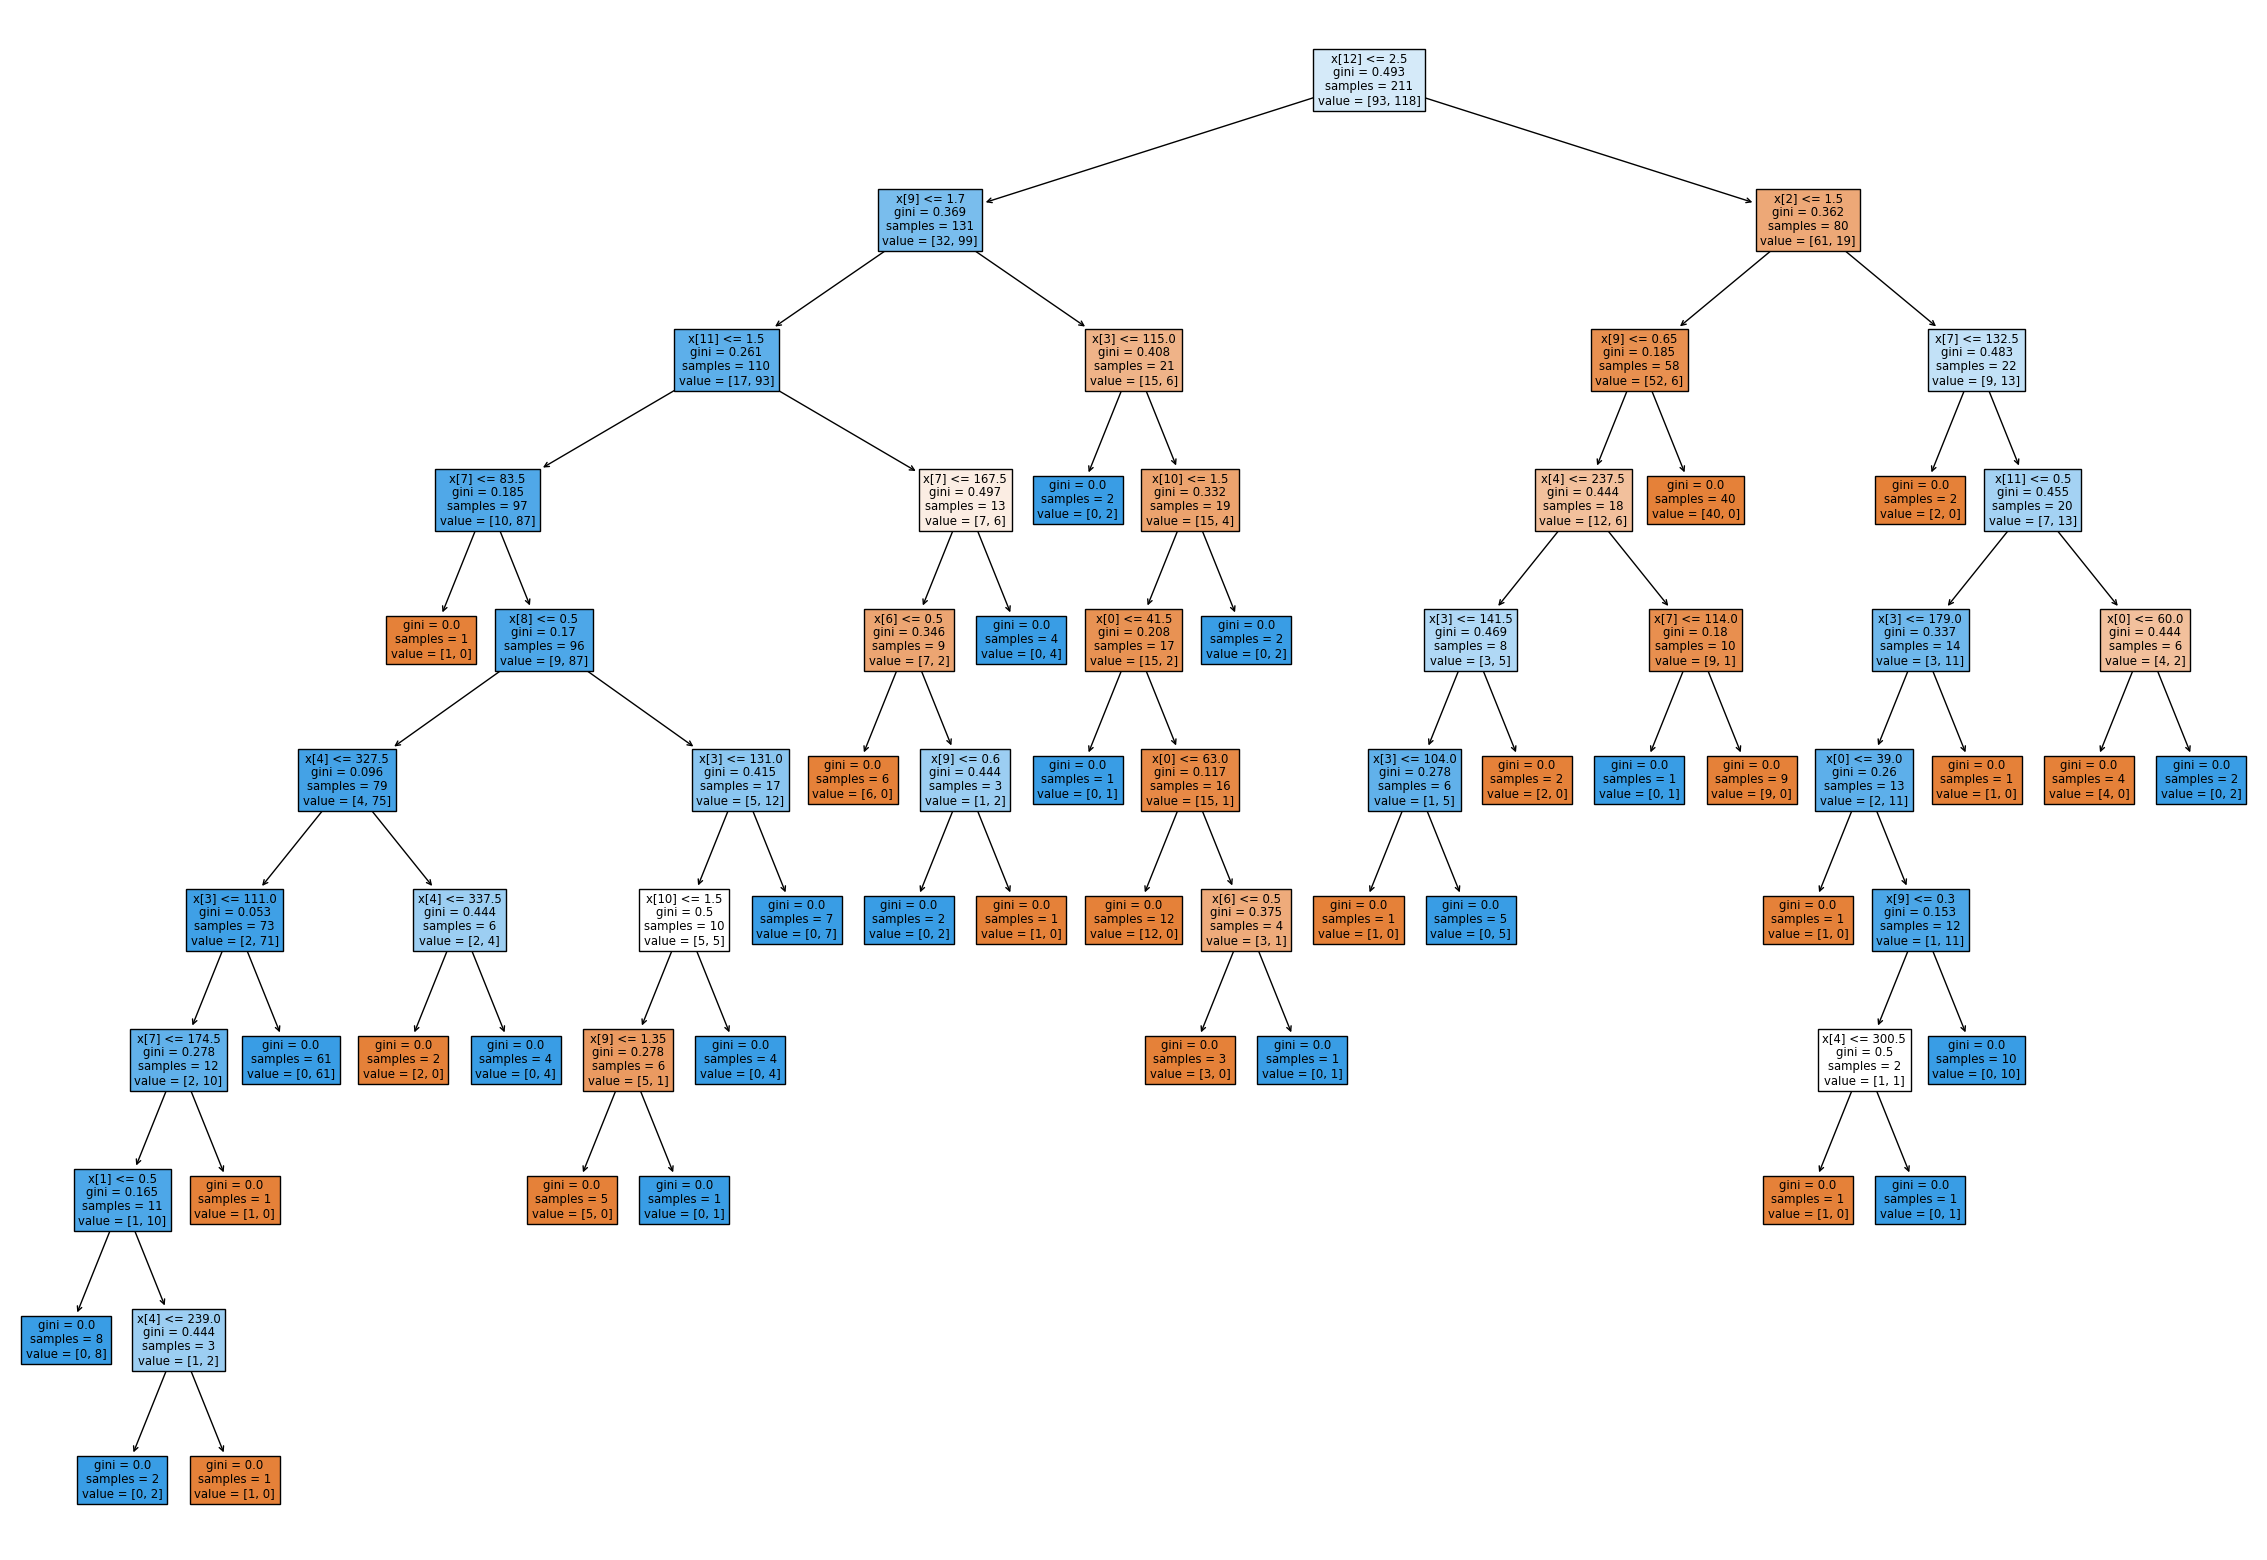

In [35]:
plt.figure(figsize=(29,20))
plot_tree(clf,filled=True)
plt.show()

In [36]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [37]:
rand.feature_importances_

array([0.09039916, 0.03484319, 0.13837696, 0.07219901, 0.08377654,
       0.00959594, 0.02463695, 0.12477676, 0.04329306, 0.13310268,
       0.06083373, 0.09994077, 0.08422527])

In [38]:
rand.feature_names_in_

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype=object)

In [39]:
from sklearn.preprocessing import StandardScaler


In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train,)
X_test = scaler.transform(X_test)

In [41]:


# Create a Support Vector Classification (SVC) model
support_vector_classifier = SVC()

# Fit the model
support_vector_classifier.fit(X_train, y_train)


SVC()

In [42]:
y_pred = support_vector_classifier.predict(X_test)

In [43]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1], dtype=int64)

In [44]:
accuracy_score(y_pred,y_test)

0.8021978021978022

In [45]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        41
           1       0.85      0.78      0.81        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



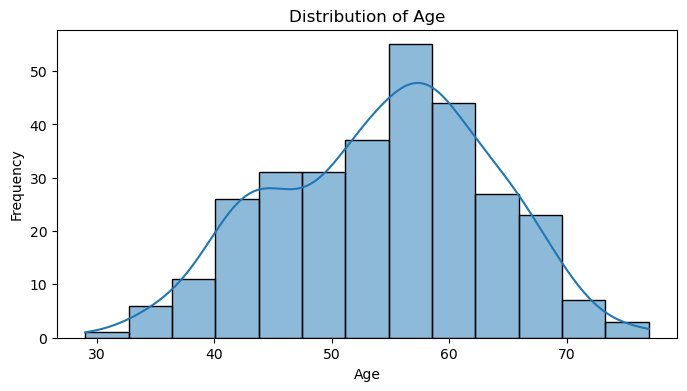

In [50]:
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=13, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()